In [55]:
import pandas as pd
from datetime import datetime

In [56]:
df = pd.read_csv('Insurance_All_Complaints_Messy_Final.csv')
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 247007
Number of columns: 18


In [57]:
#Cleaning column names 

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w\s]', '_')
print(df.columns)


Index(['unnamed__0', 'complaint_number', 'complaint_filed_against',
       'complaint_filed_by', 'reason_complaint_filed', 'confirmed_complaint',
       'how_resolved', 'received_date', 'closed_date', 'complaint_type',
       'coverage_type', 'coverage_level', 'others_involved', 'respondent_id',
       'respondent_role', 'respondent_type', 'complainant_type', 'keywords'],
      dtype='object')


/var/folders/cm/2mf41lhd765fw4n76x4lfdrc0000gn/T/ipykernel_39222/1484730310.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w\s]', '_')


In [58]:
df['complaint_filed_against_explode'] = df['complaint_filed_against'].str.replace('&', 'and', regex=False)
df['complaint_filed_against'] = df['complaint_filed_against_explode'].str.split(',')

In [59]:
df = df.explode('complaint_filed_against')

In [60]:

df['how_resolved'] = df['how_resolved'].str.split(';')
df = df.explode('how_resolved')
df['others_involved'] = df['others_involved'].str.split(';')
df = df.explode('others_involved')
df['reason_complaint_filed'] = df['reason_complaint_filed'].str.split(';')
df = df.explode('reason_complaint_filed')
df['keywords'] = df['keywords'].str.split(';')
df = df.explode('keywords')

print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

#Number of rows: 3940903
#Number of columns: 21

Number of rows: 4909709
Number of columns: 19


In [61]:

df['keywords'] = df['keywords'].str.strip()
print(df['keywords'].unique())


[nan '2012 NORTH TEXAS TORNADOES' "ADJUSTER'S HANDLING" 'CLAIM EVALUATION'
 'DAMAGE DISPUTE' 'HAIL' 'SUPPLEMENTARY PAYMENT' 'CREDIT REPORT'
 'FOUNDATION' 'WATER DAMAGE' 'DIMINISHED VALUE' 'BREED OF DOG'
 'COMPARATIVE NEGLIGENCE' 'TOTAL LOSS' 'LOSS OF USE' 'EMERGENCY CARE'
 'ROOF' 'ACV' 'BUNDLING' 'APPRAISAL' 'BURDEN OF PROOF' 'COVERAGE DISPUTE'
 'POLICY EXCLUSION' 'REPLACEMENT VEHICLE' 'DEPRECIATION' 'PRESCRIPTION'
 'RESCISSION' 'ADVERTISING' "AGENT'S FEE" 'UNDERWRITING CRITERIA'
 'REPAIR CHOICE' 'EXAM UNDER OATH' 'CHIROPRACTIC' 'SENIOR CITIZEN'
 'AUTISM SPECTRUM DISORDER' 'DEDUCTIBLE' 'NAMED DRIVER POLICY'
 'UNCOOPERATIVE INSURED' 'BETTERMENT' 'MEDICAL SAVINGS ACCOUNT'
 'AFTERMARKET PARTS' 'OVERHEAD AND PROFIT' 'FEDERAL HEALTH CARE REFORM'
 'MULTIPLE INSUREDS' 'MOLD' 'DRIVER NOT COVERED' 'MEDICARE PART D'
 'ALZHEIMER' 'EXPERIMENTAL' 'CANCER' 'SUBROGATION' 'ACQUIRED BRAIN INJURY'
 'BILL OF RIGHTS - HO' 'SLAB' 'PHARMACY' 'MATERNITY' "ENGINEER'S REPORT"
 'GRANDFATHERED HEALTH PLAN' 'WILD

In [62]:
df['coverage_type'] = df['coverage_type'].str.replace('&', 'and', regex=False)
df['coverage_type'] = df['coverage_type'].str.replace('[^\w\s]', '', regex=True)
df['complaint_type'] = df['complaint_type'].str.replace('[^\w\s]', '', regex=True)
df['coverage_level'] = df['coverage_level'].str.replace('[^\w\s]', '', regex=True)

In [63]:
df['coverage_type'].unique()

array(['Life and Annuity', 'Accident and Health', 'Automobile',
       'Homeowners', 'Miscellaneous', 'Fire Allied Lines and CMP',
       'Liability'], dtype=object)

In [64]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 4909709
Number of columns: 19


In [65]:
print(df.columns)

Index(['unnamed__0', 'complaint_number', 'complaint_filed_against',
       'complaint_filed_by', 'reason_complaint_filed', 'confirmed_complaint',
       'how_resolved', 'received_date', 'closed_date', 'complaint_type',
       'coverage_type', 'coverage_level', 'others_involved', 'respondent_id',
       'respondent_role', 'respondent_type', 'complainant_type', 'keywords',
       'complaint_filed_against_explode'],
      dtype='object')


In [66]:
df['received_date'] = df['received_date'].str.replace('*', '/', regex=False)
df['closed_date'] = df['closed_date'].str.replace('*', '/', regex=False)
df['received_date'] = df['received_date'].str.replace('?', '/', regex=False)
df['closed_date'] = df['closed_date'].str.replace('?', '/', regex=False)
df['received_date'] = df['received_date'].str.replace('-', '/', regex=False)
df['closed_date'] = df['closed_date'].str.replace('-', '/', regex=False)

df['received_date'] = pd.to_datetime(df['received_date'], format='%m/%d/%Y')
df['closed_date'] = pd.to_datetime(df['closed_date'], format='%m/%d/%Y')
df['date_difference'] = (df['closed_date'] - df['received_date']).dt.days
df['date_difference'].head()


0    43
1    41
2    49
2    49
3    32
Name: date_difference, dtype: int64

In [67]:
df.dtypes
       

unnamed__0                                  int64
complaint_number                            int64
complaint_filed_against                    object
complaint_filed_by                         object
reason_complaint_filed                     object
confirmed_complaint                        object
how_resolved                               object
received_date                      datetime64[ns]
closed_date                        datetime64[ns]
complaint_type                             object
coverage_type                              object
coverage_level                             object
others_involved                            object
respondent_id                               int64
respondent_role                            object
respondent_type                            object
complainant_type                           object
keywords                                   object
complaint_filed_against_explode            object
date_difference                             int64


In [71]:
values = [ "Teacher Retirement System", "Workers Compensation Network", "Independent Review Org", "Portal"]
df = df[df['complaint_type'].str.strip().isin(values)]

print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')


Number of rows: 50238
Number of columns: 20


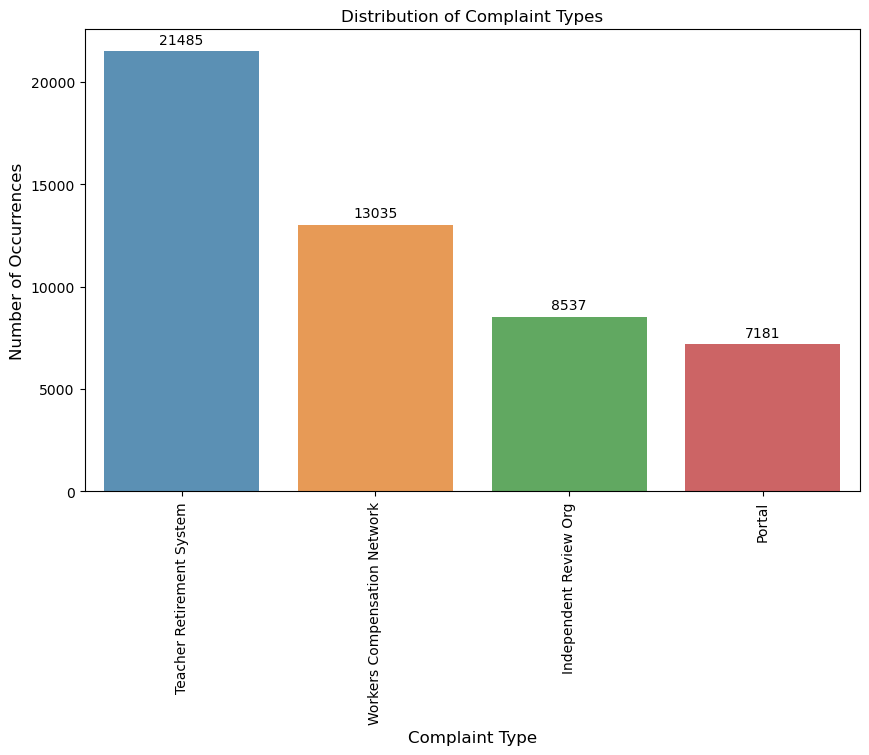

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrence of each complaint type
complaint_counts = df['complaint_type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
bar_plot = sns.barplot(x=complaint_counts.index, y=complaint_counts.values, alpha=0.8)

# Add counts on each bar
for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Distribution of Complaint Types')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Complaint Type', fontsize=12)

# Rotate x-labels for better visibility
plt.xticks(rotation=90)

plt.show()

In [73]:
df.to_csv("Insurance_complaints__All_data.csv")